## sbs24018 - Machine Learning - CA1

##### For my project, I have chosen the area of "Education" and will use the "Student Performance Dataset" dataset found at https://www.kaggle.com/datasets/devansodariya/student-performance-data



In [1]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor



In [3]:
# Load the dataset
stu_data = pd.read_csv('student_data.csv')

In [4]:
# Display the first 10 rows of the dataset.
stu_data.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

In [5]:
# Display dataset info.
stu_data.info()

      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# Describe dataset column data.
stu_data.describe()



age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [7]:
# Checking null values for all columns.
null_values = stu_data.isnull().sum()
null_values


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
# Identify the numeric and categorical columns in the dataset:
numeric_cols = stu_data.select_dtypes(include=[np.number]) 
#print(numeric_cols)

# Identify all categorical columns in the stu_data
categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)

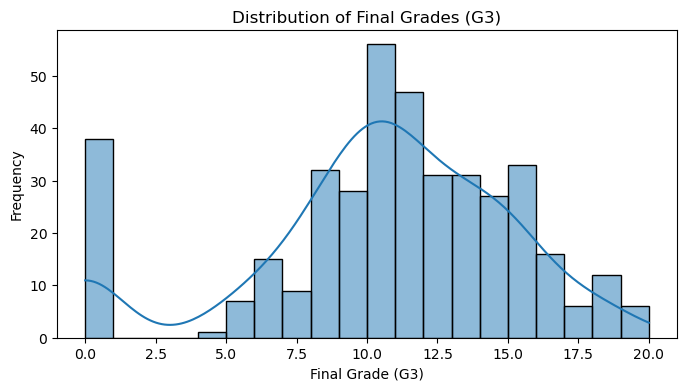

In [9]:
# Visualize the distribution of G3 final exam grades
plt.figure(figsize=(8, 4))
sns.histplot(numeric_cols['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

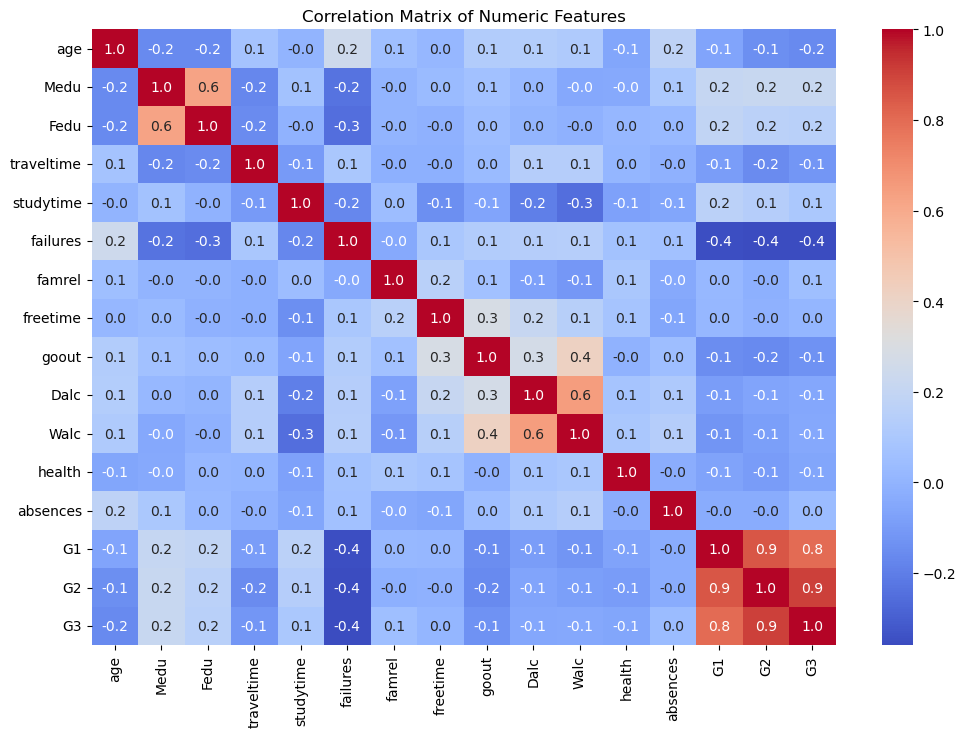

In [10]:
# Calculate and plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

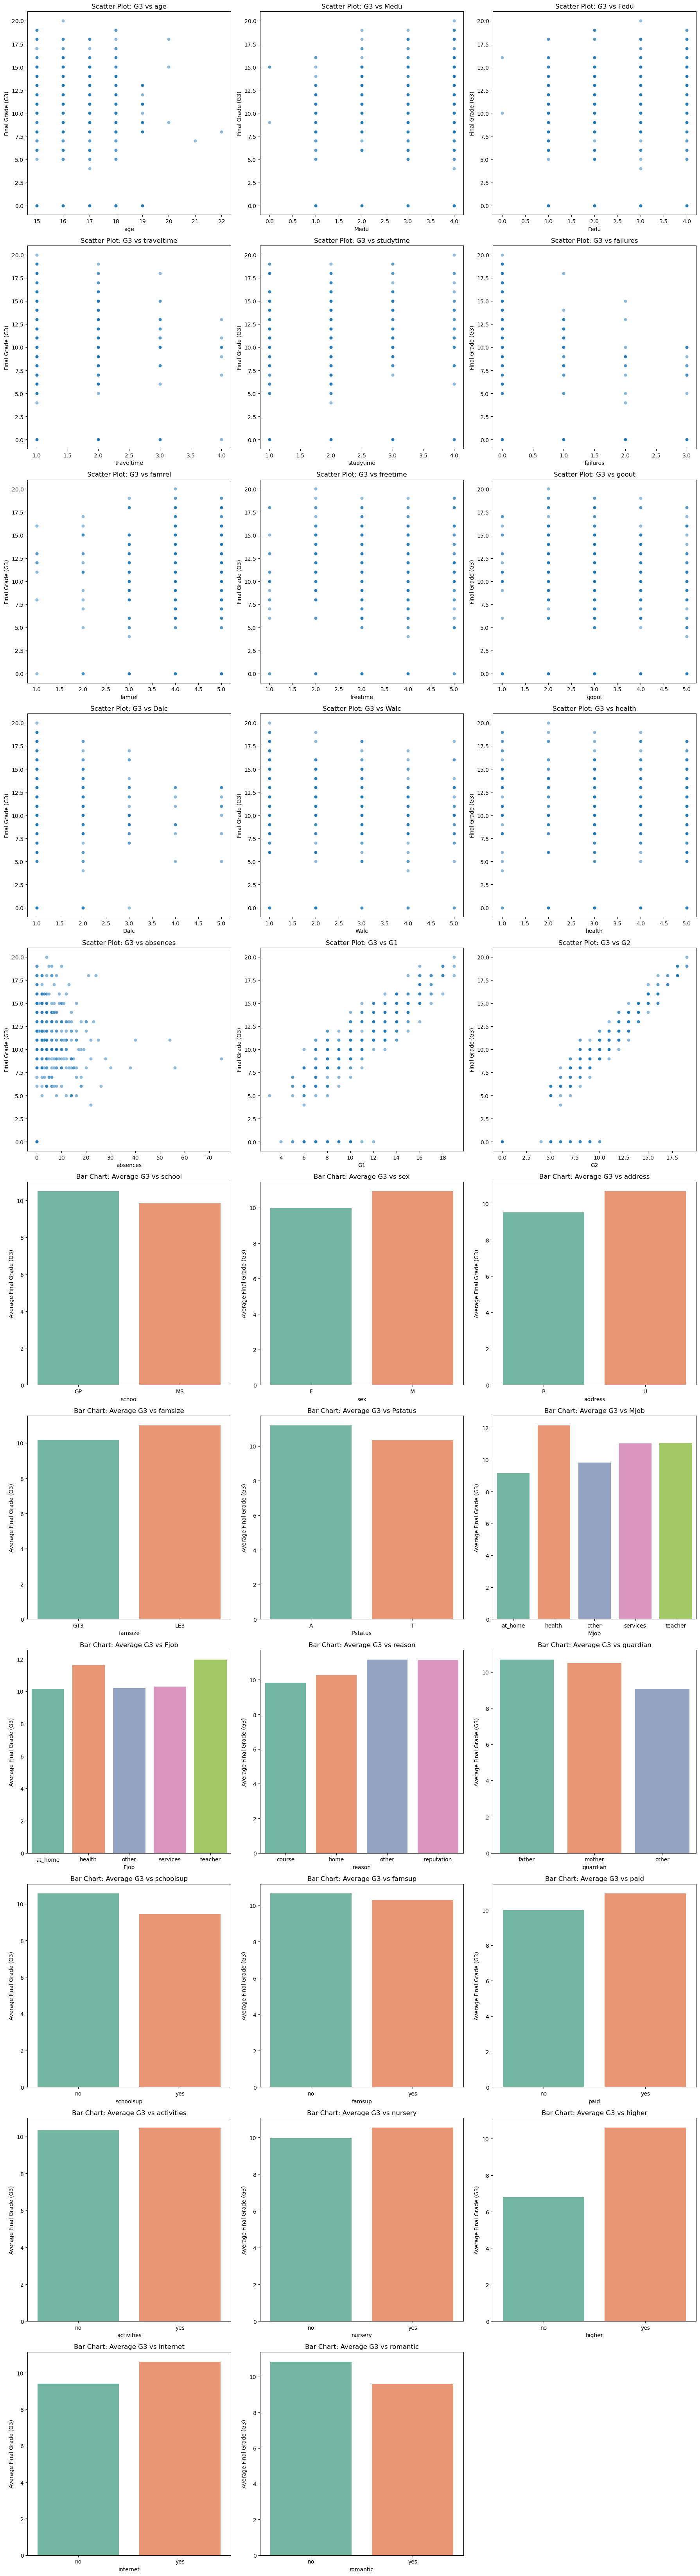

In [11]:
# Identify numeric and categorical columns, excluding 'G3' from numeric if present
numeric_cols = stu_data.select_dtypes(include=[np.number]).columns.tolist()
if 'G3' in numeric_cols:
    numeric_cols.remove('G3')
categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()

# Setting the plotting area and dimensions
num_plots = len(numeric_cols) + len(categorical_cols)
total_rows = num_plots // 3 + (num_plots % 3 > 0)

fig, axes = plt.subplots(nrows=total_rows, ncols=3, figsize=(18, 6 * total_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plotting numeric features with scatter plots
for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=stu_data[col], y=stu_data['G3'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot: G3 vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Final Grade (G3)')

# Plotting categorical features with bar charts
for j, col in enumerate(categorical_cols):
    # Calculate the mean of G3 for each category and plot
    category_means = stu_data.groupby(col)['G3'].mean().reset_index()
    sns.barplot(x=col, y='G3', data=category_means, ax=axes[len(numeric_cols) + j], palette='Set2')
    axes[len(numeric_cols) + j].set_title(f'Bar Chart: Average G3 vs {col}')
    axes[len(numeric_cols) + j].set_xlabel(col)
    axes[len(numeric_cols) + j].set_ylabel('Average Final Grade (G3)')


# Adjust layout and remove unused subplots if any
for ax in axes[len(numeric_cols) + len(categorical_cols):]:
    ax.remove()
plt.tight_layout()
plt.show()

In [12]:
# Encoding Categorical variables into numerical variables using One hot encoding
one_hot_encoded_data = pd.get_dummies(stu_data, columns=categorical_cols, drop_first=True) # Drop first because I was getting duplicate colums with inverted data
one_hot_encoded_data = one_hot_encoded_data * 1  # This converts True to 1 and False to 0


# first few rows to check the result
print(one_hot_encoded_data.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [13]:
# Display the first 10 rows of the dataset.
one_hot_encoded_data.head(10)

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   
5   16     4     3           1          2         0       5         4      2   
6   16     2     2           1          2         0       4         4      4   
7   17     4     4           2          2         0       4         1      4   
8   15     3     2           1          2         0       4         2      2   
9   15     3     4           1          2         0       5         5      1   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   
5     1  ...                1               0              0           1   
6     1  ...                1               0              0           0   
7     1  ...                1               0              1           1   
8     1  ...                1               0              0           1   
9     1  ...                1               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet_yes  \
0         0               0            1           1             0   
1         0               0            0           1             1   
2         1               0            1           1             1   
3         1               1            1           1             1   
4         1               0            1           1             0   
5         1               1            1           1             1   
6         0               0            1           1             1   
7         0               0            1           1             0   
8         1               0            1           1             1   
9         1               1            1           1             1   

   romantic_yes  
0             0  
1             0  
2             0  
3             1  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0  

[10 rows x 42 columns]

In [18]:
numeric_cols = stu_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols)
numeric_cols_v2 = one_hot_encoded_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols, "\n")

categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)
categorical_cols_v2 = one_hot_encoded_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols, "\n")


all_cols_v2 = one_hot_encoded_data.columns.tolist()
print(all_cols_v2)


['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


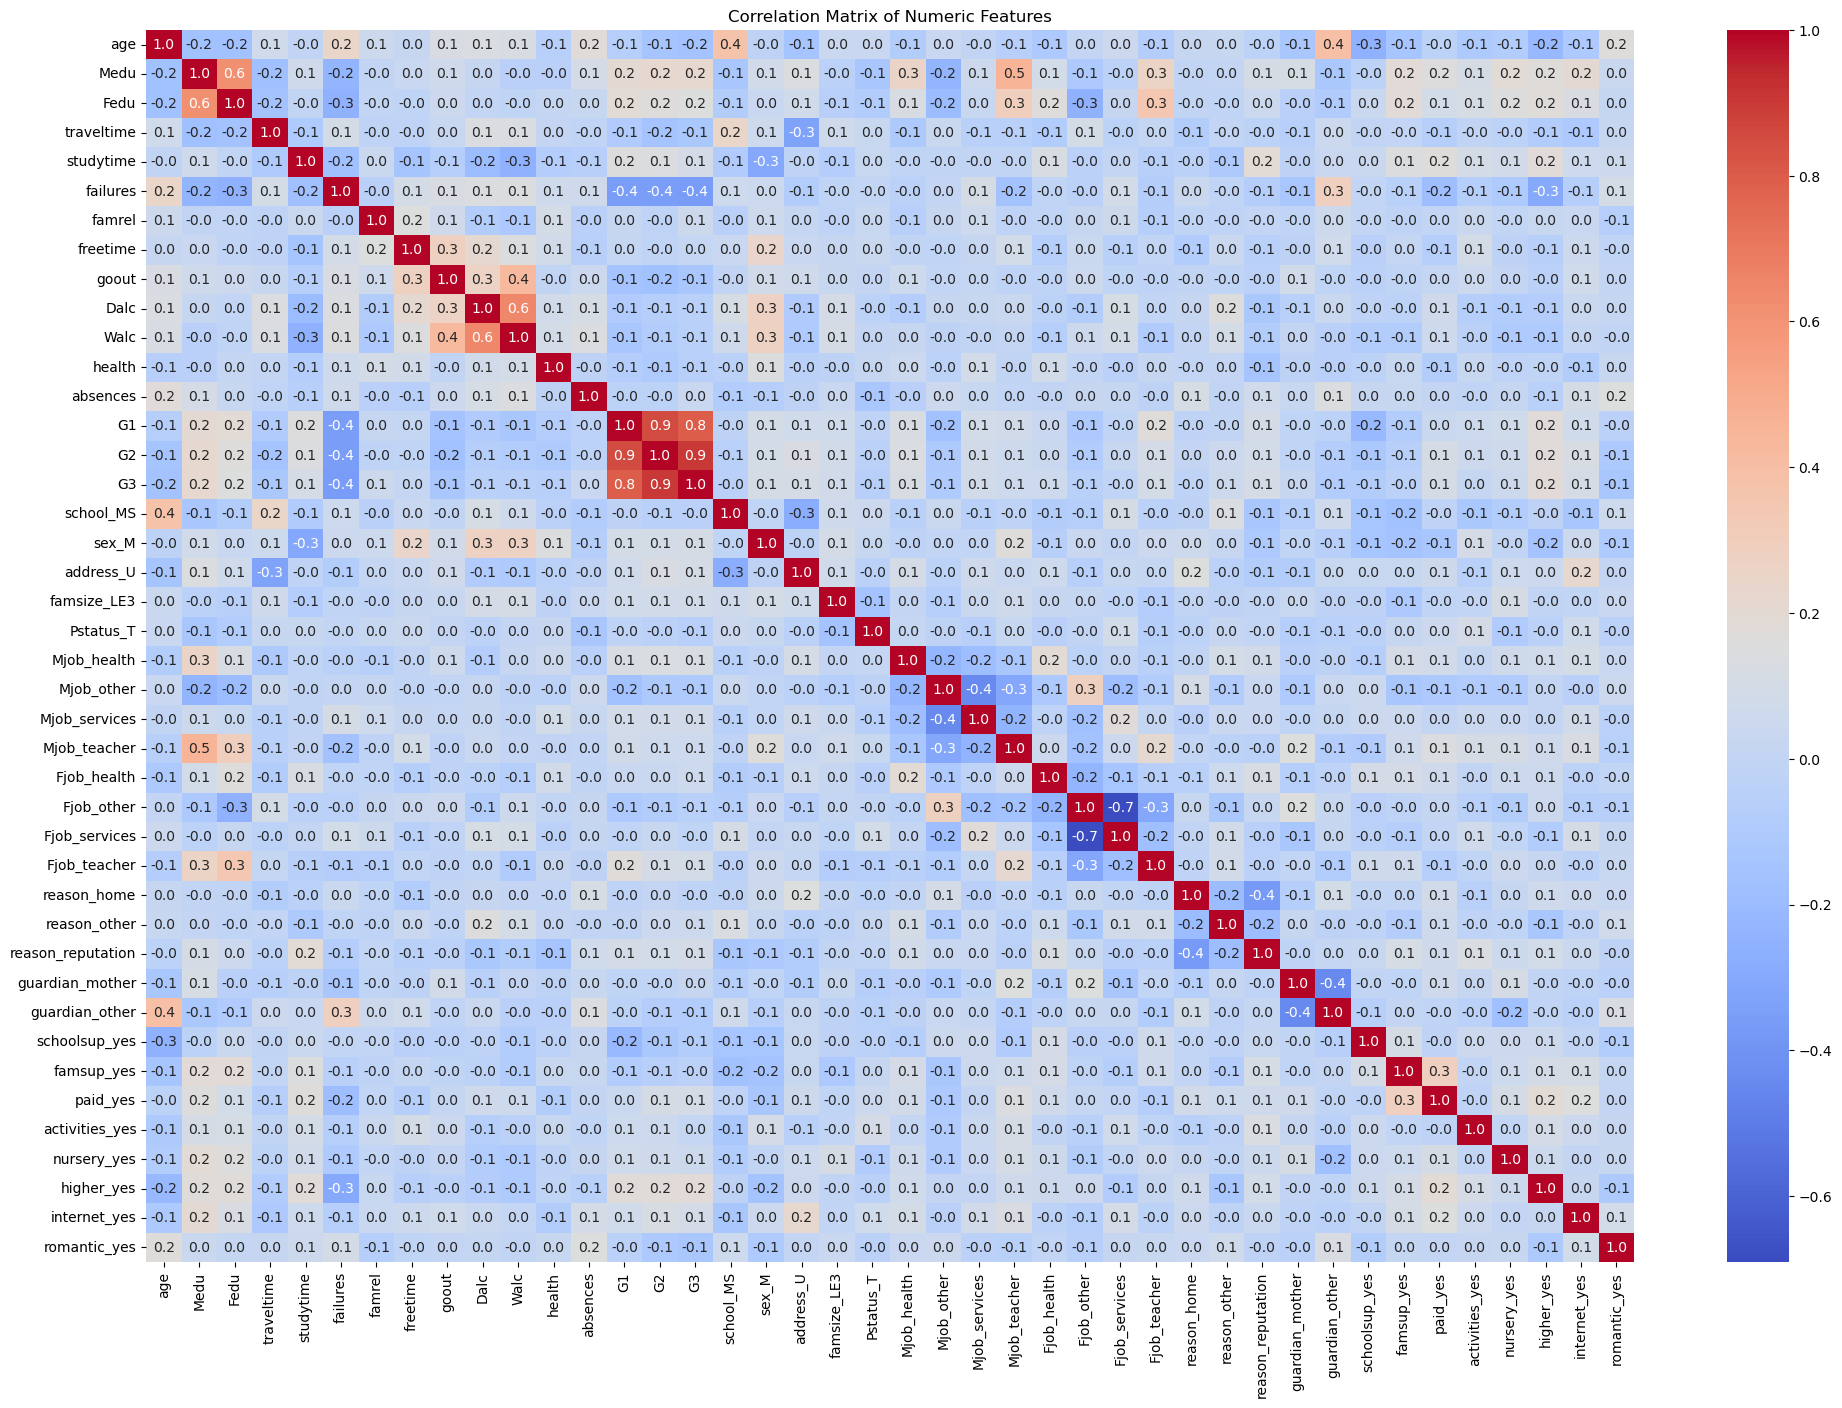

In [19]:
# Calculate and plot the correlation matrix again
plt.figure(figsize=(24, 16))
correlation_matrix = one_hot_encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [20]:
# Split the dataset into X and y columns
X = one_hot_encoded_data.drop('G3', axis=1)  # Independent variables
y = one_hot_encoded_data['G3']  # Dependent variable G3 

# Split the data into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Show the rows and columns
print("X:", X.shape)
print("y:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X: (395, 41)
y: (395,)
X_train shape: (296, 41)
X_test shape: (99, 41)
y_train shape: (296,)
y_test shape: (99,)


In [21]:
# Method to calculate the cross validation score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [22]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.7814768535960913
STD:  0.07806959169411934




In [23]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

-1.7289663104255464
[-0.12991401  0.00779842 -0.14617061  0.10478782 -0.1009103  -0.13572965
  0.38349255 -0.03941348  0.18135899 -0.24577886  0.04831897  0.0258263
  0.05276522  0.21334173  0.95373486  0.29692013  0.36688037  0.0236334
 -0.08040544 -0.28529384 -0.35806234 -0.13417489 -0.03812406  0.1632791
  0.47376466  0.16345192 -0.11416427 -0.04475325 -0.5580363   0.43283732
 -0.1063799   0.23138453 -0.3145062   0.74578129  0.22612034  0.12000141
 -0.55055969 -0.29078102  0.63888937 -0.16139569 -0.27184515]


In [24]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
y_pred

array([ 6.25083253, 11.83038939,  3.22885433,  9.25756481,  8.7537037 ,
       11.65524566, 18.77414713,  7.15527336,  7.44368684, 12.24559936,
       14.58035661,  5.5699005 , 13.31602777, 11.94371945, 14.64174491,
        8.67680095,  6.09426038, 10.89132007, 13.96446611,  8.09349145,
       13.82710575, 16.35526572, 13.74922118,  5.81789596,  8.04178987,
       20.51960917, 10.74151414,  9.28279971, 16.93978472, 11.08417146,
        9.5589892 ,  6.98634908, 14.63353439, 13.10212711,  5.41313008,
        4.29287071, -2.20240131, 15.43264764, 12.13716351,  7.02916855,
        5.98519352, 10.02659553, 14.51997591,  7.15665628, 17.02899266,
        9.43786772, 11.46660572, 13.59666074, 10.59829511, 15.90188437,
       14.20081173, 14.69621837,  9.92051565,  7.56282074,  3.67557167,
       12.52954999, 10.56965353,  6.73009655, 15.21156289, 16.13212696,
       13.30337338,  7.77373449,  8.73556384,  3.95715071,  3.42072892,
       16.43173533,  8.08520003,  8.82900232,  9.04189945, 16.08

In [25]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

Actual  Predicted
78       10   6.250833
371      12  11.830389
248       5   3.228854
55       10   9.257565
390       9   8.753704

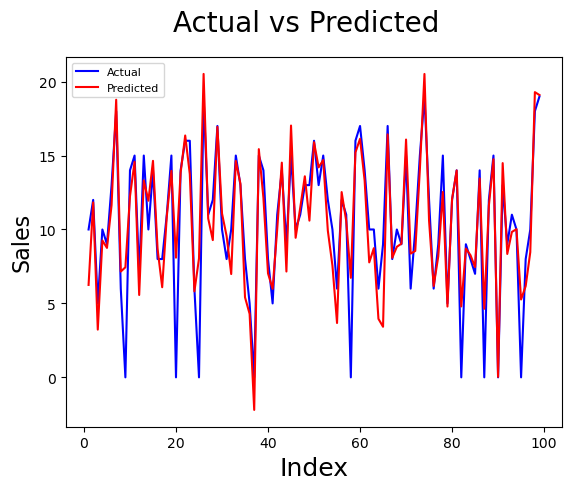

In [26]:
# Ploat actual v prediced values.

c = [i for i in range(1, 100)]  # Generating index adjusted to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('Sales', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

In [27]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.483800525651309
Mean Squared Error: 5.042664379229086
Root Mean Squared Error: 2.245587758077846
R-squared: 0.781113964140658


##### Training split = 20%
- Mean Absolute Error: 1.6466656197147507
- Mean Squared Error: 5.656642833231222
- Root Mean Squared Error: 2.3783697847961367
- R-squared: 0.7241341236974022

##### Training split = 25%
- Mean Absolute Error: 1.483800525651309
- Mean Squared Error: 5.042664379229086
- Root Mean Squared Error: 2.245587758077846
- R-squared: 0.781113964140658

##### Training split = 30%
- Mean Absolute Error: 1.525057339388754
- Mean Squared Error: 4.993008659924369
- Root Mean Squared Error: 2.234504119469098
- R-squared: 0.7728598737079843


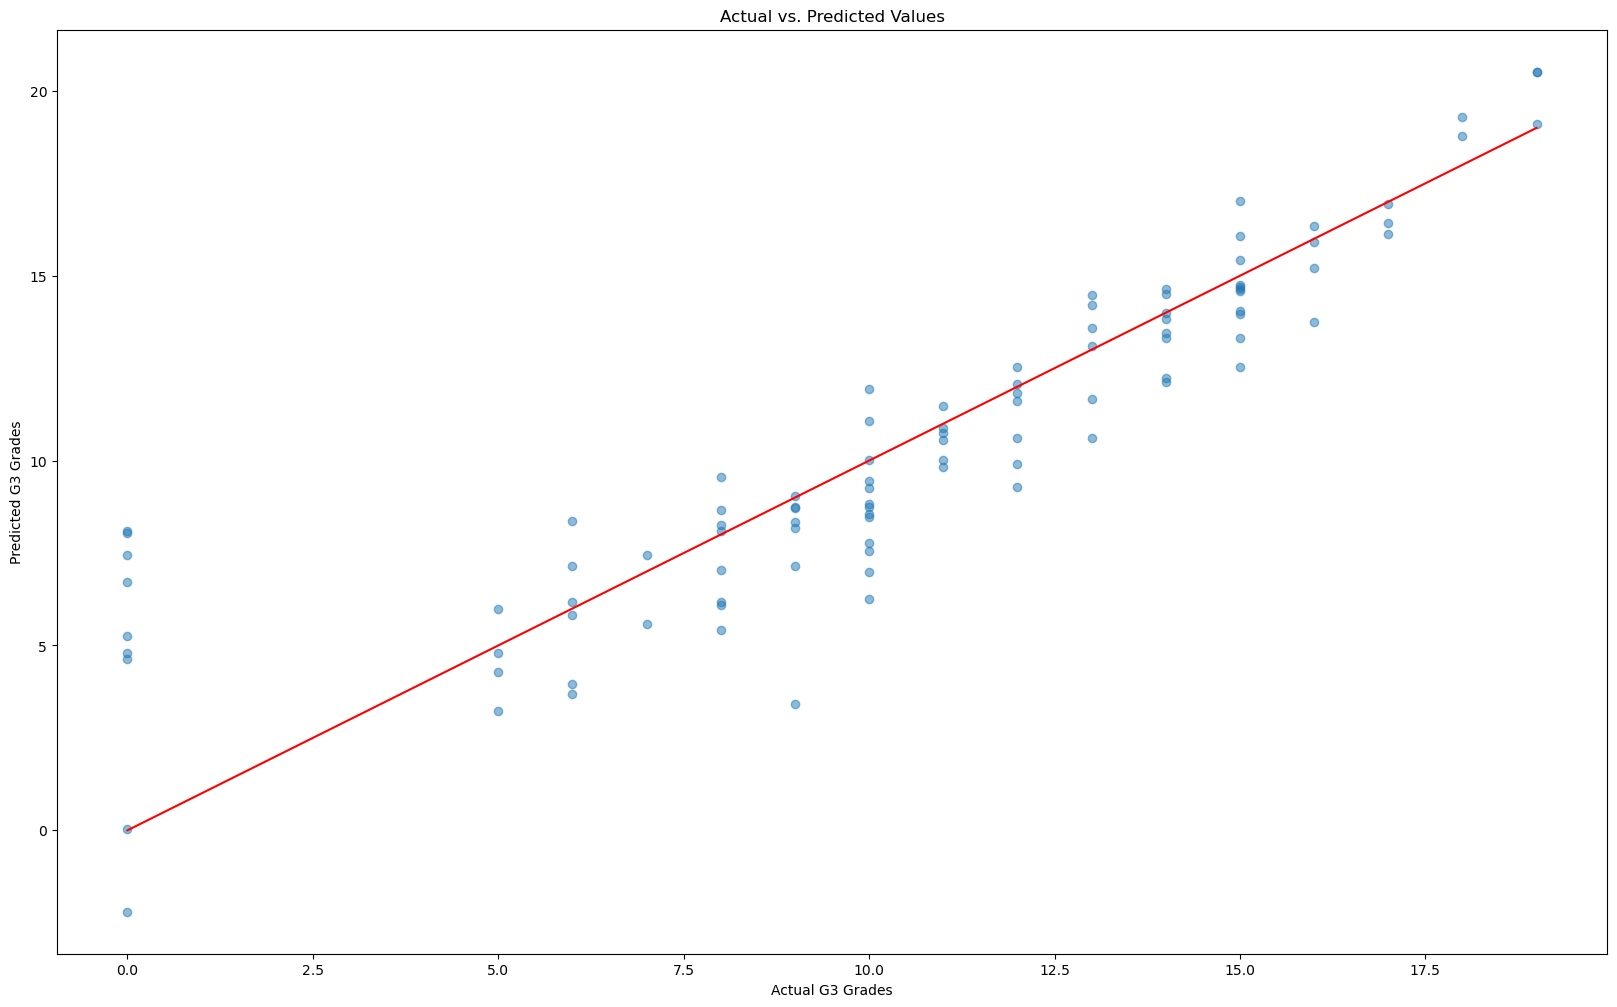

In [28]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(20, 12))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line where actual = predicted
plt.show()



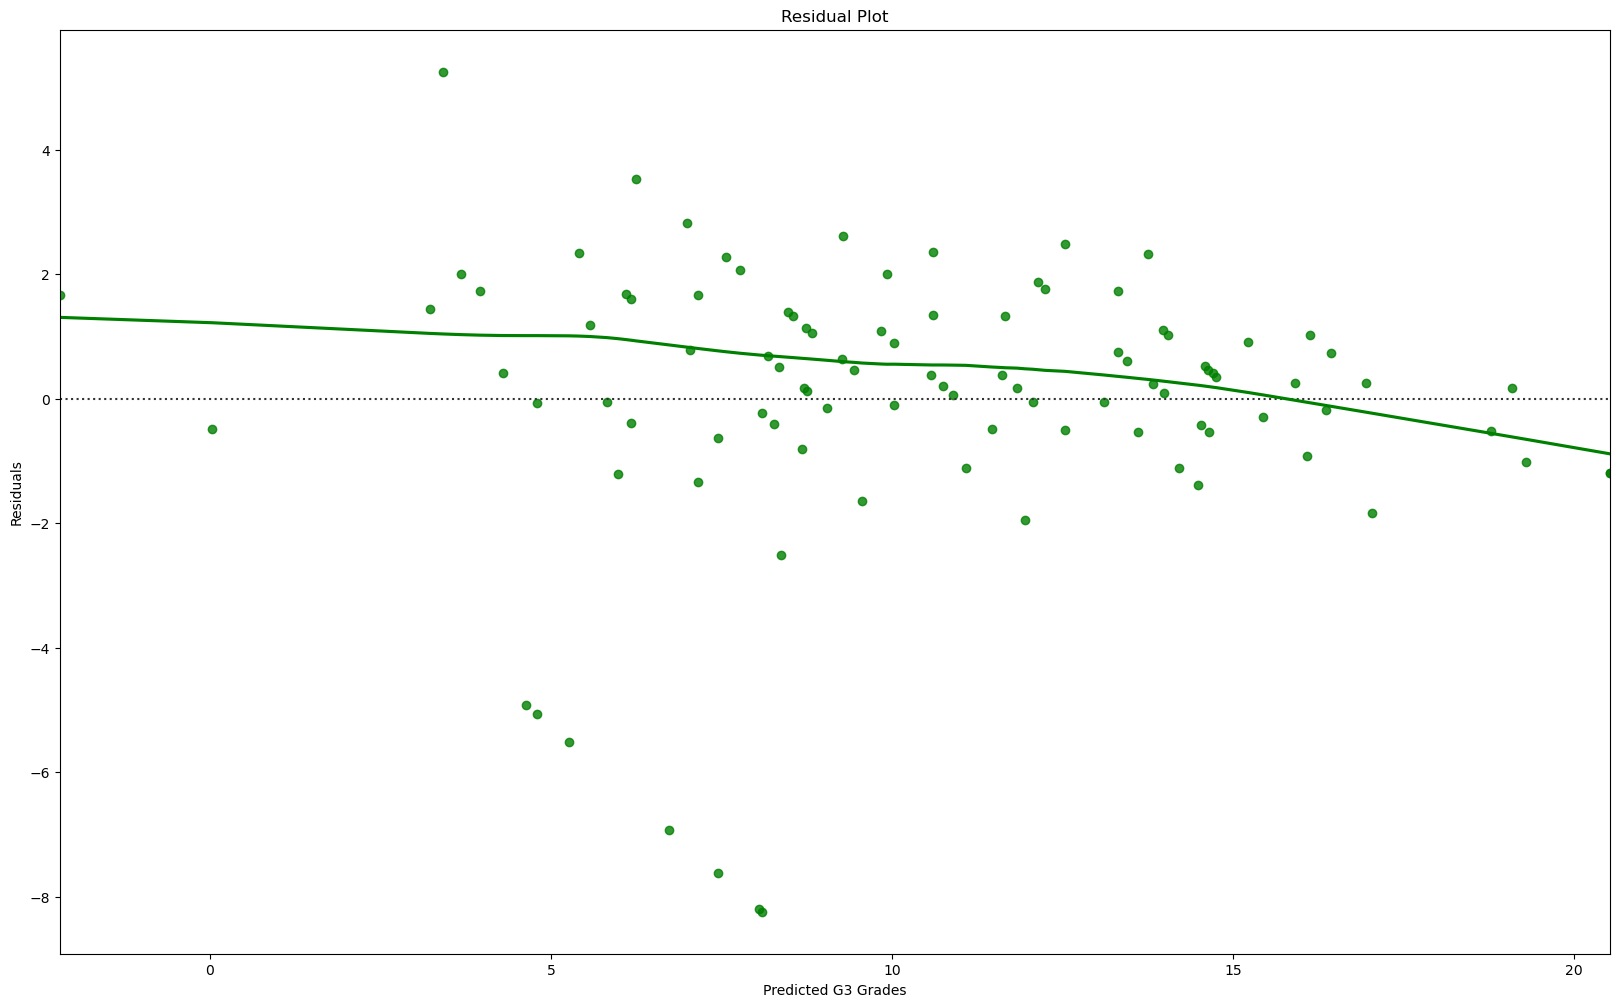

In [29]:
# Residual plot
plt.figure(figsize=(20, 12))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted G3 Grades')
plt.ylabel('Residuals')
plt.show()

In [30]:
# Get the important features using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [31]:
print(selection.feature_importances_)

[6.56994889e-03 3.81107880e-03 2.77203395e-03 8.25581982e-03
 1.37971688e-02 8.88380016e-03 6.24704033e-03 4.39903332e-03
 5.93466802e-03 2.12081787e-03 3.72495707e-03 8.51138940e-03
 3.97174615e-02 2.04469790e-01 6.10984463e-01 2.38571952e-03
 2.20565010e-03 1.10893936e-03 1.34552112e-03 1.28462548e-03
 1.03355188e-03 3.60715215e-03 2.90938588e-03 1.73193366e-03
 4.95142081e-04 2.87243563e-03 5.29536339e-03 6.50978162e-04
 9.88114468e-03 5.17558867e-04 2.03144885e-03 3.51080869e-03
 3.32418910e-03 2.91894555e-03 2.04768828e-03 2.33548856e-03
 4.60242073e-03 3.83602881e-03 3.43494526e-03 1.13597952e-03
 3.29748389e-03]


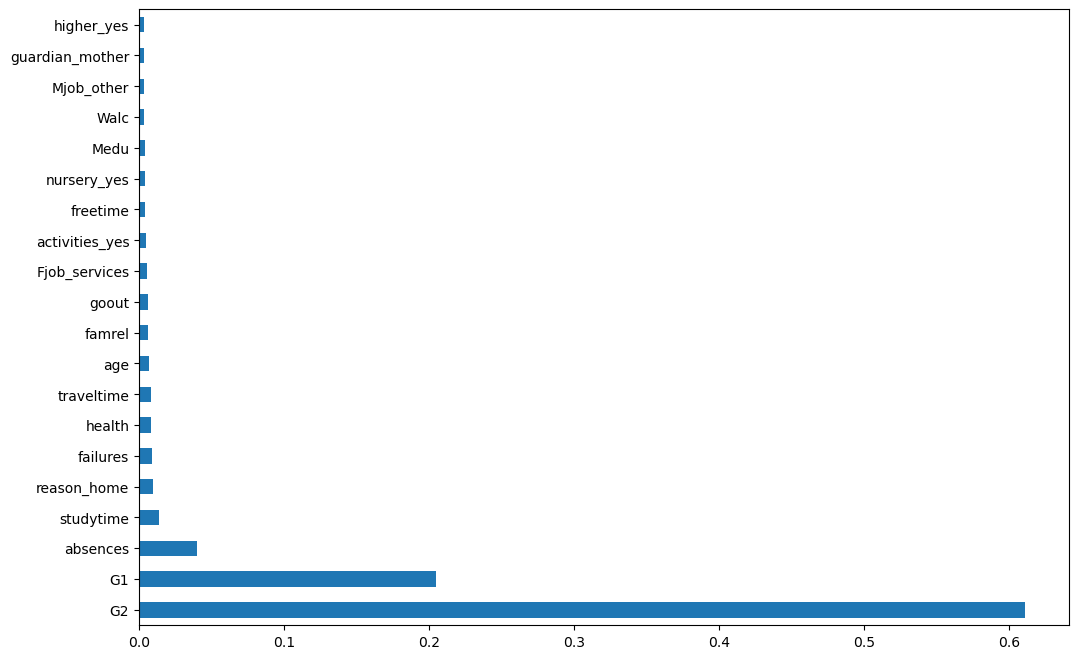

In [32]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

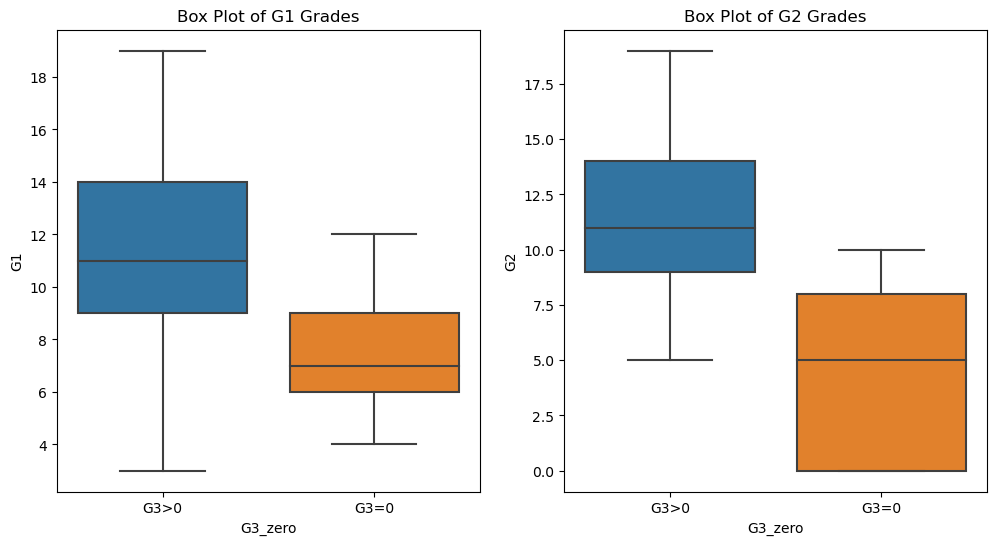

In [33]:
# Create a new column for plotting purposes
stu_data['G3_zero'] = stu_data['G3'].apply(lambda x: 'G3=0' if x == 0 else 'G3>0')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='G3_zero', y='G1', data=stu_data)
plt.title('Box Plot of G1 Grades')

plt.subplot(1, 2, 2)
sns.boxplot(x='G3_zero', y='G2', data=stu_data)
plt.title('Box Plot of G2 Grades')
plt.show()

In [34]:
# I am going to remove the 38 cases where G3 is zero because I am making the assumption that these students did not sit the exam
stu_data_who_sat_exam = one_hot_encoded_data[one_hot_encoded_data['G3'] > 0]


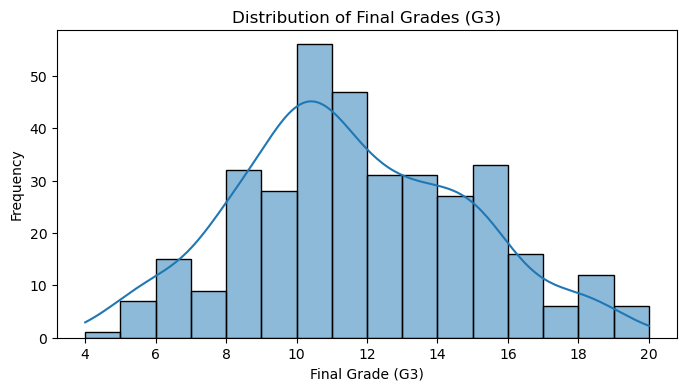

In [35]:
# Visualize the distribution of G3 after I exclude the students who did not sit the exam
plt.figure(figsize=(8, 4))
sns.histplot(stu_data_who_sat_exam['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Split the dataset into X and y columns
X = stu_data_who_sat_exam.drop('G3', axis=1)  # Independent variables
y = stu_data_who_sat_exam['G3']  # Dependent variable G3 

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Show the rows and columns
print("X:", X.shape)
print("y:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X: (357, 41)
y: (357,)
X_train shape: (249, 41)
X_test shape: (108, 41)
y_train shape: (249,)
y_test shape: (108,)


In [37]:
# Method to calculate the cross validation score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [38]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.9224235886310483
STD:  0.020046857045192903




In [39]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

0.2558780731236201
[ 0.04045303 -0.02562161 -0.07277703  0.06525678 -0.03631117  0.00811249
  0.1548355  -0.03895766 -0.12370755 -0.0291201   0.06078598 -0.06170727
 -0.01298834  0.1503914   0.84783472 -0.03801653 -0.14638822  0.06863626
 -0.14434149 -0.37344559 -0.02084444 -0.32841761 -0.03196389  0.37926957
  0.32484299  0.35900626  0.20766128  0.21875068  0.01079517 -0.22616305
 -0.00652891 -0.05996008 -0.45720873  0.02749574  0.17546856 -0.12874318
 -0.06997936 -0.34373447 -0.05977801  0.27030332 -0.04384302]


In [40]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
#y_pred

In [41]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

Actual  Predicted
243      12  12.322739
42       18  18.116543
319      11  11.579748
328       9   9.645440
56       15  15.603885

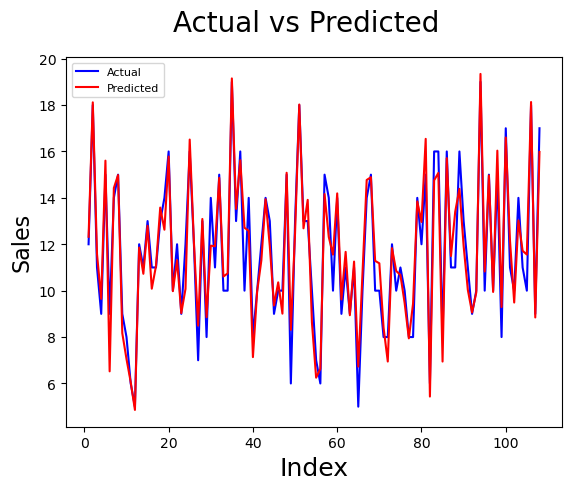

In [42]:
# Ploat actual v prediced values.

c = [i for i in range(1, 109)]  # Generating index to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('Sales', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

In [43]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.7201225256673967
Mean Squared Error: 0.8840190605458739
Root Mean Squared Error: 0.9402228781229873
R-squared: 0.912569543462496


##### Training split = 20% (Including 0 grades)
- Mean Absolute Error: 1.6466656197147507
- Mean Squared Error: 5.656642833231222
- Root Mean Squared Error: 2.3783697847961367
- R-squared: 0.7241341236974022

##### Training split = 20% (Excluding 0 grades)
- Mean Absolute Error: 0.6748214503583269
- Mean Squared Error: 0.8093960199604425
- Root Mean Squared Error: 0.8996643929601985
- R-squared: 0.9159860447415067 

##### Training split = 25% (Including 0 grades)
- Mean Absolute Error: 1.483800525651309
- Mean Squared Error: 5.042664379229086
- Root Mean Squared Error: 2.245587758077846
- R-squared: 0.781113964140658

##### Training split = 25% (Excluding 0 grades)
- Mean Absolute Error: 0.719230638279496
- Mean Squared Error: 0.8832102513840957
- Root Mean Squared Error: 0.93979266404037
- R-squared: 0.9084744506907121 

##### Training split = 30% (Including 0 grades)
- Mean Absolute Error: 1.525057339388754
- Mean Squared Error: 4.993008659924369
- Root Mean Squared Error: 2.234504119469098
- R-squared: 0.7728598737079843

##### Training split = 30% (Excluding 0 grades)
- Mean Absolute Error: 0.7201225256673967
- Mean Squared Error: 0.8840190605458739
- Root Mean Squared Error: 0.9402228781229873
- R-squared: 0.912569543462496


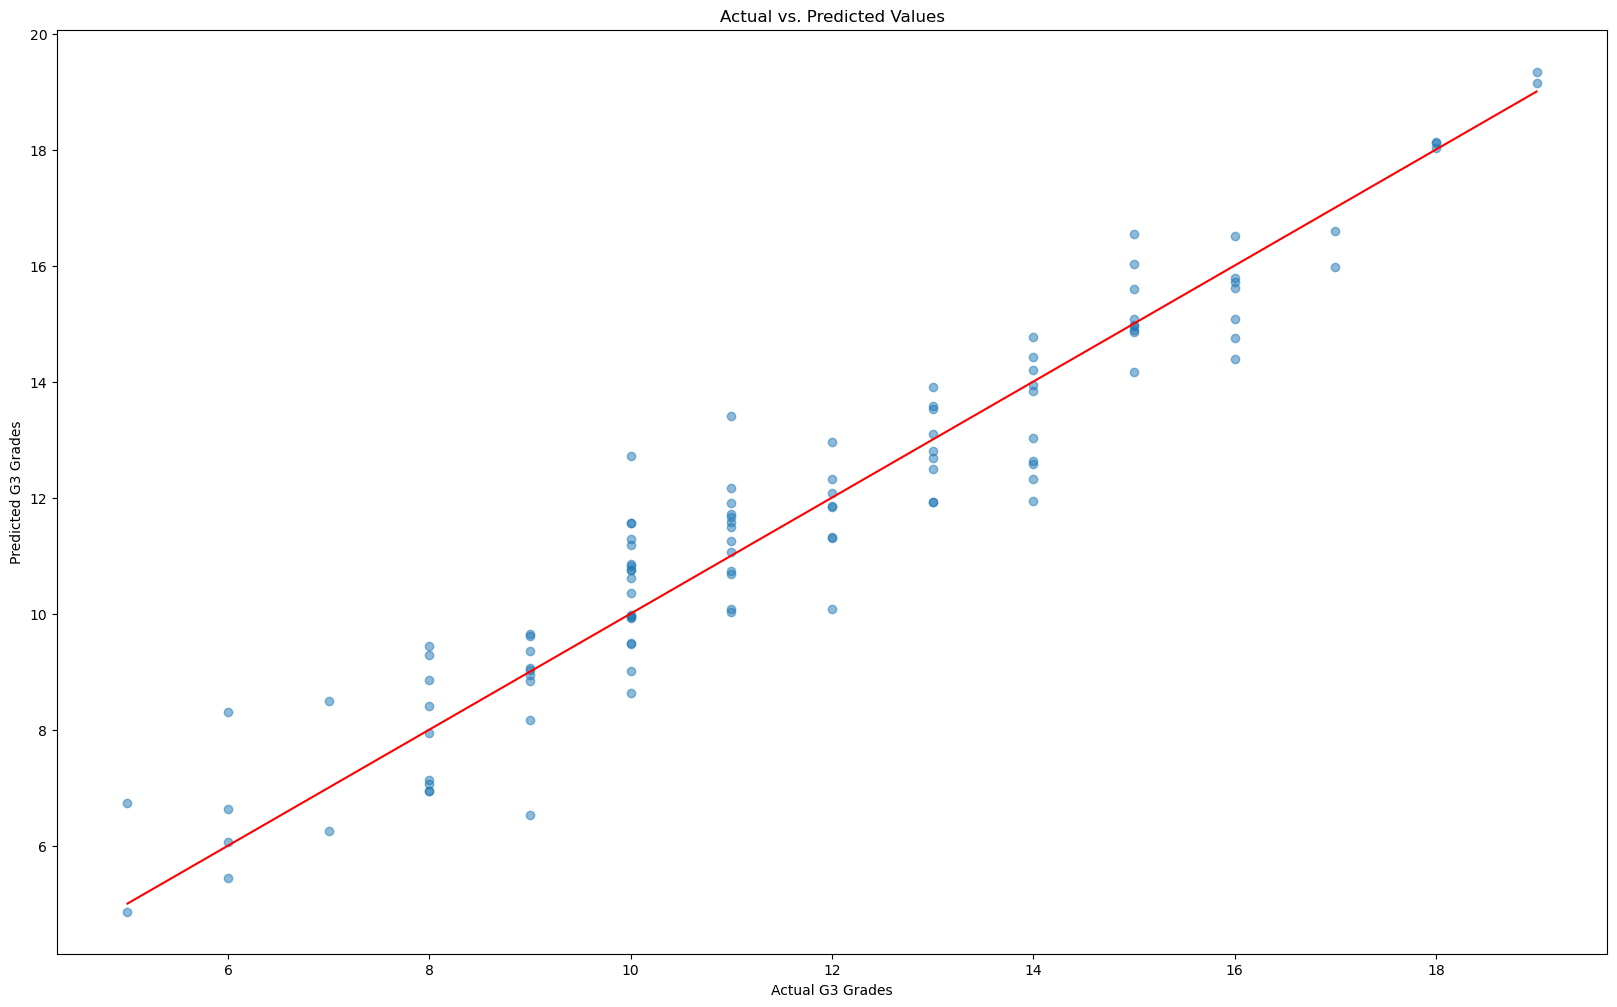

In [44]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(20, 12))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line where actual = predicted
plt.show()

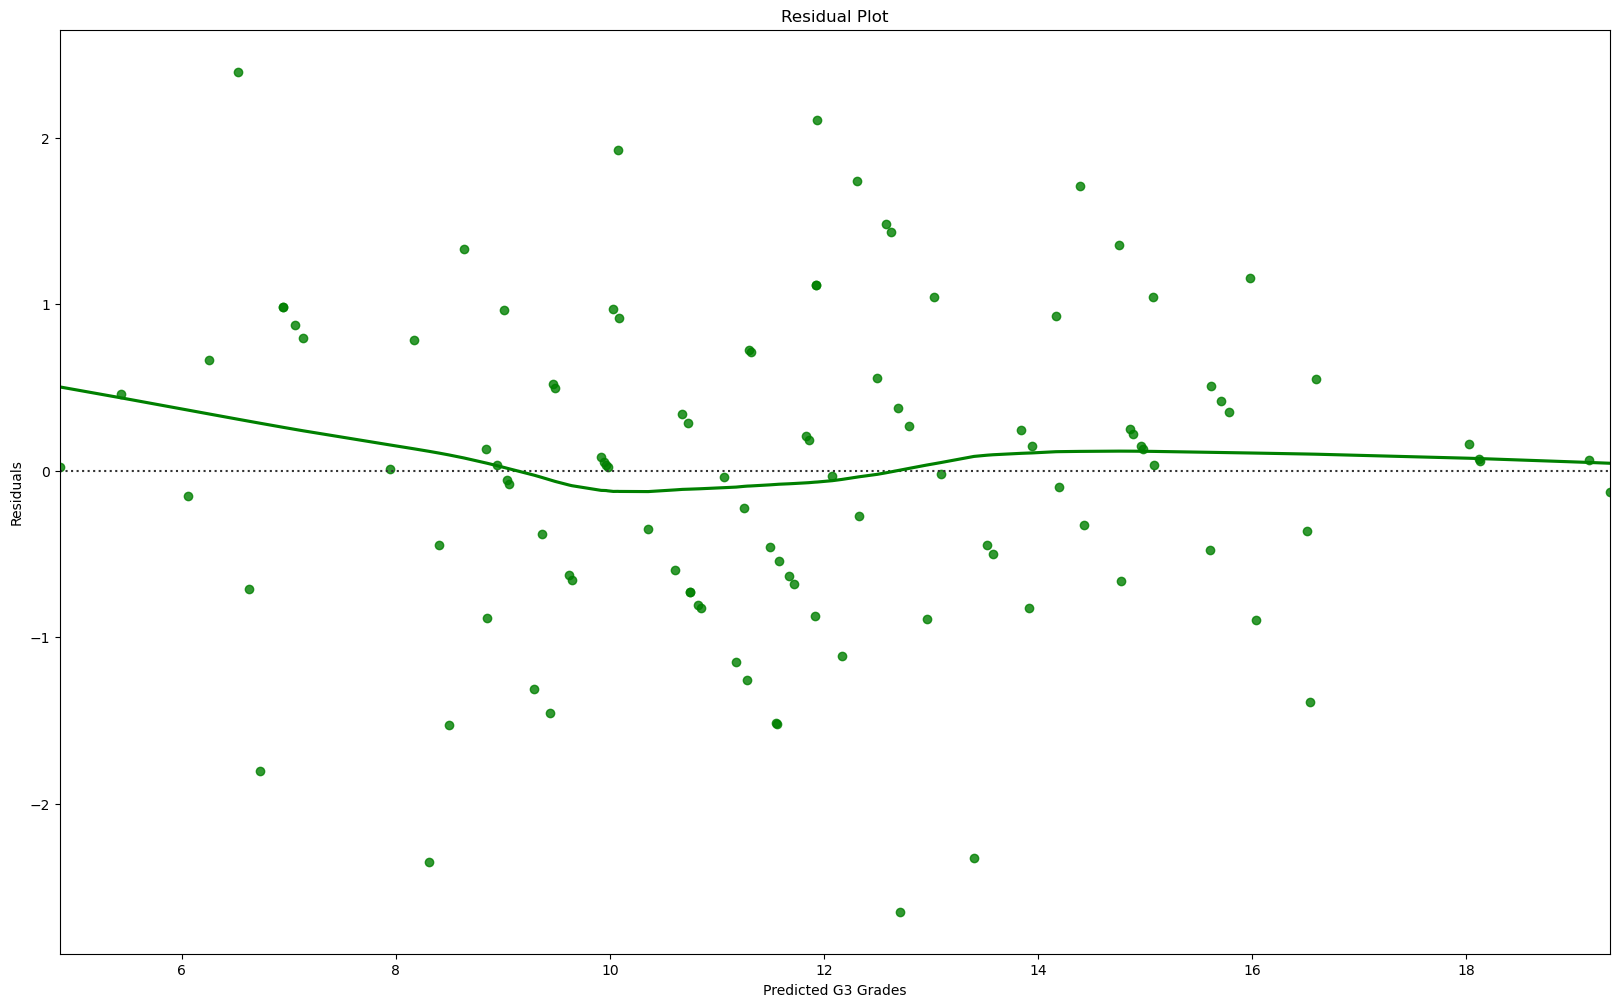

In [45]:
# Residual plot
plt.figure(figsize=(20, 12))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted G3 Grades')
plt.ylabel('Residuals')
plt.show()

In [46]:
# Get the important features using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [47]:
print(selection.feature_importances_)

[3.02156914e-03 1.87193117e-03 1.76586452e-03 1.71636334e-03
 1.75801167e-03 2.62400260e-03 3.77237415e-03 1.59300823e-03
 3.10744411e-03 1.41871672e-03 3.15104244e-03 2.48764867e-03
 2.38632209e-03 2.49267327e-01 6.84612563e-01 4.61059664e-04
 2.03360700e-03 1.68043249e-03 1.50275383e-03 9.72025351e-04
 6.20945856e-04 2.28776383e-03 1.89405861e-03 9.94719685e-04
 9.65948447e-04 1.92814592e-03 9.40202311e-04 1.14480421e-03
 8.35443439e-04 5.98556995e-04 2.43188516e-03 1.18723975e-03
 3.91635027e-04 3.18607759e-03 1.72567275e-03 1.31799209e-03
 8.40054328e-04 2.06152853e-03 1.00972030e-04 8.24291797e-04
 2.51799451e-03]


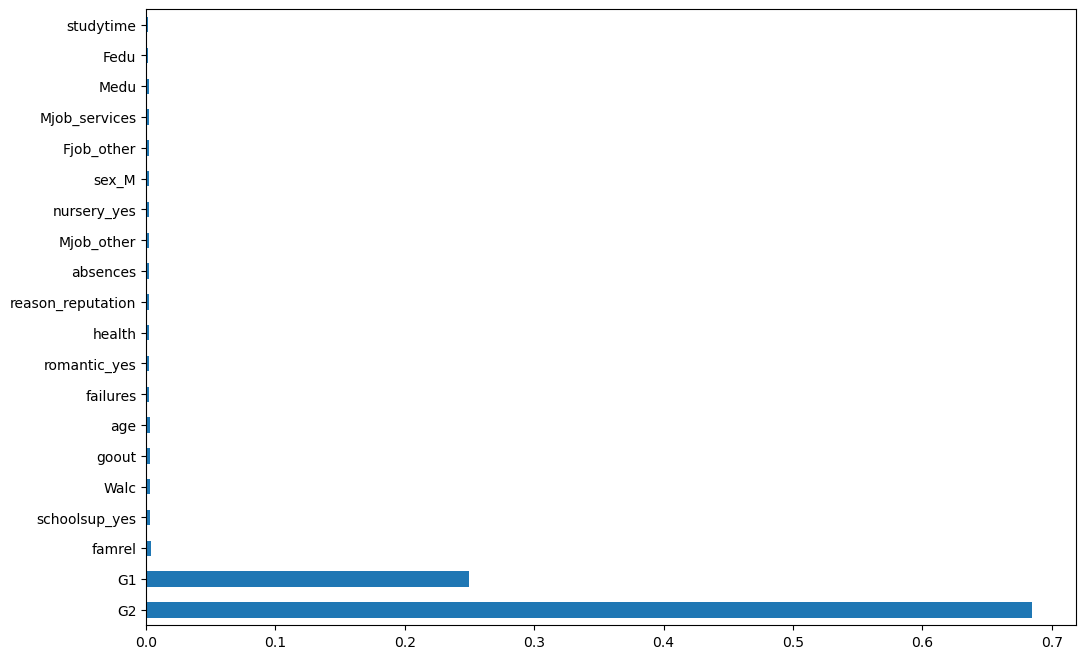

In [48]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [50]:
# Method to calculate the cross validation score
def get_cv_score(model):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv = 10,
                             scoring='r2')
    
    
    return np.mean(scores)

In [51]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [52]:
lr.fit(X_train,y_train)

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7201225256673967
MSE: 0.8840190605458739
RMSE: 0.9402228781229873
R2 Square 0.912569543462496
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5869970062915941
MSE: 0.5411478435528033
RMSE: 0.7356275168540145
R2 Square 0.9484500344958234
__________________________________


In [53]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , get_cv_score(lr)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model       MAE       MSE      RMSE  R2 Square  \
0  Linear Regression  0.720123  0.884019  0.940223    0.91257   

   Cross Validation  
0          0.922424

In [54]:
# Import the library for the model named as 'SVM'
from sklearn import svm

# Create a classifier
cls_svm = svm.SVC(kernel = "linear")   

# Train the model
cls_svm.fit(X_train, y_train)

# Predict the response
y_pred = cls_svm.predict(X_test)

In [55]:
cls_svm.fit(X_train,y_train)

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7201225256673967
MSE: 0.8840190605458739
RMSE: 0.9402228781229873
R2 Square 0.912569543462496
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5869970062915941
MSE: 0.5411478435528033
RMSE: 0.7356275168540145
R2 Square 0.9484500344958234
__________________________________


In [56]:
SVM_results_df = pd.DataFrame(data=[["SVM", *evaluate(y_test, test_pred) , get_cv_score(cls_svm)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
SVM_results_df

Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0   SVM  0.720123  0.884019  0.940223    0.91257          0.881513